In [783]:
import sys
import sqlite3
import importlib
sys.path.extend(['.', '..'])

import pandas as pd
import matplotlib.pyplot as plt
import sys
import matplotlib 
import numpy as np
import scipy.stats

%matplotlib inline
pd.set_option('display.max_columns', None)

from etl import cbs, joins

importlib.reload(joins)

/Users/ewanog/Documents/work/code/venv/p3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DtypeWarning: Columns (22,23,57,58,69,70,72,73) have mixed types. Specify dtype option on import or set low_memory=False.


INFO:etl.joins:Diff in counts from CBS data, OCHA pcode:
INFO:etl.joins:              vcode_hh  vcode_pc  diff
dist_code_hh                          
524 1 02 07         30        36    -6
524 1 02 09         27        34    -7
524 1 02 10         56        63    -7
524 1 03 11         31        35    -4
524 1 03 12         73        76    -3
524 1 03 13         56        56     0
524 2 04 20         54        54     0
524 2 04 21         55        55     0
524 2 04 22         52        52     0
524 2 05 23         79        79     0
524 2 05 24         90        90     0
524 2 05 25         26        42   -16
524 2 05 26          6        18   -12
524 2 05 27         11        59   -48
524 2 05 28         62        62     0
524 2 05 29         18        18     0
524 2 05 30         50        50     0
524 2 06 31         44        45    -1
524 2 06 35         16        39   -23
524 3 07 36         67        67     0
524 3 07 37         40        61   -21
524 3 07 39         34        4

../etl/joins.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


INFO:etl.joins:Counts of nulls in merge of CBS, OCHA pcodes
INFO:etl.joins:dist_code_hh        0
vdcmun_hh           0
vcode_hh            0
dist_hh             0
inc_10to20_hh       0
inc_20to30_hh       0
inc_30to50_hh       0
inc_0to10_hh        0
inc_greater50_hh    0
mrg_hh              0
vcode_pc            0
dist_code_pc        0
VDC_NAME_pc         0
VDC_CODE_pc         0
DIST_NAME_pc        0
mrg_pc              0
priority_hh         0
dtype: int64
INFO:etl.joins:
INFO:etl.joins:


<module 'etl.joins' from '../etl/joins.py'>

In [785]:
"""data loads"""

t_full = joins.Dataset()
full = t_full.get_nra() 

dig = z

/Users/ewanog/Documents/work/code/venv/p3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: DtypeWarning: Columns (22,23,57,58,69,70,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


INFO:etl.joins:Diff in counts from CBS data, OCHA pcode:
INFO:etl.joins:              vcode_hh  vcode_pc  diff
dist_code_hh                          
524 1 02 07         30        36    -6
524 1 02 09         27        34    -7
524 1 02 10         56        63    -7
524 1 03 11         31        35    -4
524 1 03 12         73        76    -3
524 1 03 13         56        56     0
524 2 04 20         54        54     0
524 2 04 21         55        55     0
524 2 04 22         52        52     0
524 2 05 23         79        79     0
524 2 05 24         90        90     0
524 2 05 25         26        42   -16
524 2 05 26          6        18   -12
524 2 05 27         11        59   -48
524 2 05 28         62        62     0
524 2 05 29         18        18     0
524 2 05 30         50        50     0
524 2 06 31         44        45    -1
524 2 06 35         16        39   -23
524 3 07 36         67        67     0
524 3 07 37         40        61   -21
524 3 07 39         34        4

../etl/joins.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


INFO:etl.joins:Counts of nulls in merge of CBS, OCHA pcodes
INFO:etl.joins:dist_code_hh        0
vdcmun_hh           0
vcode_hh            0
dist_hh             0
inc_10to20_hh       0
inc_20to30_hh       0
inc_30to50_hh       0
inc_0to10_hh        0
inc_greater50_hh    0
mrg_hh              0
vcode_pc            0
dist_code_pc        0
VDC_NAME_pc         0
VDC_CODE_pc         0
DIST_NAME_pc        0
mrg_pc              0
priority_hh         0
dtype: int64
INFO:etl.joins:
INFO:etl.joins:


In [ ]:
"""useful funcs"""

#good for checking nulls and not breaking
pd.isnull(corr.iloc[105]['hrrp_code']) 

In [787]:
"""utils"""


def get_income_score(df, vdc_hrrp):
    """"num * val / MAX_VAL * num"""
    #TODO: convert to itterrows
    if pd.isnull(vdc_hrrp):
        return np.nan
    
    else:
        MAX_VAL = 6
        vofi = df[df['hrrp_code'] == vdc_hrrp]
        score_dict = { vofi['inc_0to10'].values[0] : 0,
                        vofi['inc_10to20'].values[0] : 1,
                        vofi['inc_20to30'].values[0] : 2, 
                        vofi['inc_30to50'].values[0] : 4,
                        vofi['inc_greater50'].values[0] : 6 }

        numer = 0
        denom = 0
        for k,v in score_dict.items():
            k = (0 if np.isnan(k) else k)
            numer += k * v
            denom += MAX_VAL * k

        if denom == 0:
            return 0

        else:
            return numer / denom    

def test_get_income_score_max():
    dt = pd.DataFrame([('vdc',0,0,0,0,100)], columns = ['hrrp_code', 'inc_0to10', 
                                                      'inc_10to20', 'inc_20to30', 'inc_30to50','inc_greater50'])
    assert(get_income_score(dt, 'vdc') == 1)

def test_get_income_score_min():
    dt = pd.DataFrame([('vdc',100,0,0,0,0)], columns = ['hrrp_code', 'inc_0to10', 
                                                      'inc_10to20', 'inc_20to30', 'inc_30to50','inc_greater50'])
    assert(get_income_score(dt, 'vdc') == 0)

def test_get_income_score_avg():
    dt = pd.DataFrame([('vdc',882,135,23,11,7)], columns = ['hrrp_code', 'inc_0to10', 
                                                      'inc_10to20', 'inc_20to30', 'inc_30to50','inc_greater50'])
    assert(get_income_score(dt, 'vdc') == 267 / 6348)

test_get_income_score_max()
test_get_income_score_min()
test_get_income_score_avg()

In [732]:
corr['inc_score'] = corr.apply(lambda x : get_income_score(corr, x['hrrp_code']), axis = 1) 

# corr['houses_varified_for_second_installment']/corr['total_HH']


In [710]:
corr.fillna(0)

,district,vdc_municipality,total_HH,no_hh_with_grant_agreement,no_hh_with_first_installment,site_layout,houses_not_varified_for_second_installment,houses_varified_for_second_installment,houses_not_able_to_varified_for_sec_instal,remaining_for_second_install,houses_not_varified_for_third_installment,houses_varified_for_third_installment,houses_not_able_to_verified_for_third_instal,remaining_for_third_install,construction_completed,complainace,complaince_resolved,self_completed_houses,engineer_name,engineer_contact_no,remark,uid,data_entered_date,concat,hrrp_code,District,vdc,hlcit_code,dist_code_hh,vdcmun,vcode_hh,dist_hh,inc_10to20,inc_20to30,inc_30to50,inc_0to10,inc_greater50,vdc_dist_mrg_hh,vcode_pc,vdc_name_pc,hclit_code_pc,dist_name_pc,priority,inc_score,pct_grant,pct_remain,const_rate
0,KABHREPALANCHOK,Chauri Pokhari,678,660.0,660.0,36.0,36.0,36.0,0.0,36.0,36.0,36.0,0.0,36.0,36.0,313.0,72.0,16.0,Dinesh Raj Bhattrai,9848787762,0,13,2017-07-02 19:21:05+00,KABHREPALANCHOKChauri Pokhari,524 2 05 24 5 068,KABHREPALANCHOK,Chauri Pokhari,524 2 05 24 5 042,524 2 05 24,68.0,Pokhari Chauri,Kabhrepalanchok,388.0,312.0,74.0,130.0,38.0,524 2 05 2468,C-BAG-24-068,Chauri Pokhari,524 2 05 24 5 042,Kabhrepalanchok,True,0.271762,0.053097,0.053097,0.117333
1,KABHREPALANCHOK,Simthali,441,407.0,407.0,90.0,88.0,88.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,pradip pokharel,9851213857,0,13,2017-07-03 16:50:33+00,KABHREPALANCHOKSimthali,524 2 05 24 5 085,KABHREPALANCHOK,Simthali,524 2 05 24 5 087,524 2 05 24,85.0,Simthali,Kabhrepalanchok,151.0,51.0,3.0,274.0,0.0,524 2 05 2485,C-BAG-24-085,Simthali,524 2 05 24 5 087,Kabhrepalanchok,True,0.092206,0.199546,0.199546,0.208617
2,KABHREPALANCHOK,Milche,436,435.0,435.0,32.0,24.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Animesh Nepal,9842084633,0,13,2017-07-03 20:38:06+00,KABHREPALANCHOKMilche,524 2 05 24 5 060,KABHREPALANCHOK,Milche,524 2 05 24 5 045,524 2 05 24,60.0,Milche,Kabhrepalanchok,31.0,8.0,1.0,501.0,0.0,524 2 05 2460,C-BAG-24-060,Milche,524 2 05 24 5 045,Kabhrepalanchok,True,0.015712,0.055046,0.055046,0.000000
3,GORKHA,Laprak,573,573.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,11,2017-07-04 15:19:10+00,GORKHALaprak,524 3 07 36 5 037,GORKHA,Laprak,524 3 07 36 5 047,524 3 07 36,37.0,Laprak,Gorkha,118.0,11.0,2.0,475.0,1.0,524 3 07 3637,W-GAN-36-037,Laprak,524 3 07 36 5 047,Gorkha,True,0.042284,0.000000,0.000000,0.000000
4,GORKHA,Lho,249,246.0,209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,"Due to Winter Season for last few months, the ...",11,2017-07-04 15:19:42+00,GORKHALho,524 3 07 36 5 039,GORKHA,Lho,524 3 07 36 5 040,524 3 07 36,39.0,Lho,Gorkha,124.0,7.0,5.0,143.0,8.0,524 3 07 3639,W-GAN-36-039,Lho,524 3 07 36 5 040,Gorkha,True,0.119628,0.000000,0.000000,0.000000
5,GORKHA,Samagaun,224,220.0,207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,Due to winter season the technicians were depl...,11,2017-07-04 15:20:21+00,GORKHASamagaun,524 3 07 36 5 052,GORKHA,Samagaun,524 3 07 36 5 042,524 3 07 36,52.0,Samagaun,Gorkha,10.0,0.0,0.0,199.0,0.0,524 3 07 3652,W-GAN-36-052,Samagaun,524 3 07 36 5 042,Gorkha,True,0.007974,0.000000,0.000000,0.000000
6,NUWAKOT,Likhu,707,683.0,683.0,156.0,150.0,174.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,35.0,34.0,26.0,Sulabh Aryal,9841155104,0,16,2017-07-05 16:04:20+00,NUWAKOTLikhu,524 2 05 28 5 037,NUWAKOT,Likhu,524 2 05 28 5 017,524 2 05 28,37.0,Likhu,Nuwakot,301.0,194.0,25.0,145.0,6.0,524 2 05 2837,C-BAG-28-037,Likhu,524 2 05 28 5 017,Nuwakot,True,0.204918,0.246110,0.246110,0.000000
7,NUWAKOT,Samudratar,500,486.0,486.0,130.0,130.0,122.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,68.0,66.0,34.0,Santosh Giri,9849738227,0,16,2017-07-05 16:40:53+00,NUWAKOTSamudratar,524 2 05 28 5 050,NUWAKOT,Samudratar,524 2 05 28 5 032,524 2 05 28,50.0,Samundratar,Nuwakot,55.0,17.0,12.0,456.0,8.0,524 2 05 2850,C-BAG-28-050,Samudratar,524 2 05 28 5 032,Nuwakot,True,0.056265,0.244000,0.244000,0.000000
8,NUWAKOT,Rautbesi,796,783.0,783.0,86.0,60.0,88.0,0.0,3.0,0.0,0.0,0.0

In [739]:
#TODO: replace NaNs?
corr = d.get_nra()

corr[['site_layout', 'construction_completed', 'self_completed_houses', 'total_HH','complaince_resolved']] = \
corr[['site_layout', 'construction_completed', 'self_completed_houses', 'total_HH','complaince_resolved']].dropna()

corr['const_rate'] = (corr['site_layout'] + corr['construction_completed'] + corr['self_completed_houses'])\
     / (corr['total_HH'] + corr['complaince_resolved'])
    
corr['const_rate'].describe()

INFO:__main__:Diff in counts from CBS data, OCHA pcode:
INFO:__main__:             vcode_hh  vcode_pc  diff
dist_code                            
524 1 02 07        30        36    -6
524 1 02 09        27        34    -7
524 1 02 10        56        63    -7
524 1 03 11        31        35    -4
524 1 03 12        73        76    -3
524 1 03 13        56        56     0
524 2 04 20        54        54     0
524 2 04 21        55        55     0
524 2 04 22        52        52     0
524 2 05 23        79        79     0
524 2 05 24        90        90     0
524 2 05 25        26        42   -16
524 2 05 26         6        18   -12
524 2 05 27        11        59   -48
524 2 05 28        62        62     0
524 2 05 29        18        18     0
524 2 05 30        50        50     0
524 2 06 31        44        45    -1
524 2 06 35        16        39   -23
524 3 07 36        67        67     0
524 3 07 37        40        61   -21
524 3 07 39        34        45   -11
524 3 07 40       

/Users/ewanog/Documents/work/code/venv/p3/lib/python3.6/site-packages/ipykernel_launcher.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


INFO:__main__:Counts of nulls in merge of CBS, OCHA pcodes
INFO:__main__:dist_code_hh     0
vdcmun           0
vcode_hh         0
dist             0
inc_10to20       0
inc_20to30       0
inc_30to50       0
inc_0to10        0
inc_greater50    0
mrg              0
vcode_pc         0
dist_code_pc     0
VDC_NAME         0
VDC_CODE         0
DIST_NAME        0
priority         0
dtype: int64
INFO:__main__:
INFO:__main__:


count    127.000000
mean       0.217607
std        0.113615
min        0.022075
25%        0.146910
50%        0.195592
75%        0.272135
max        0.745492
Name: const_rate, dtype: float64

In [434]:
corr

,district,vdc_municipality,total_HH,no_hh_with_grant_agreement,no_hh_with_first_installment,site_layout,houses_not_varified_for_second_installment,houses_varified_for_second_installment,houses_not_able_to_varified_for_sec_instal,remaining_for_second_install,houses_not_varified_for_third_installment,houses_varified_for_third_installment,houses_not_able_to_verified_for_third_instal,remaining_for_third_install,construction_completed,complainace,complaince_resolved,self_completed_houses,engineer_name,engineer_contact_no,remark,uid,data_entered_date,concat,hrrp_code,District,vdc,hlcit_code,dist_code_hh,vdcmun,vcode_hh,dist_hh,inc_10to20,inc_20to30,inc_30to50,inc_0to10,inc_greater50,vdc_dist_mrg_hh,vcode_pc,vdc_name_pc,hclit_code_pc,dist_name_pc,priority,inc_score
0,KABHREPALANCHOK,Chauri Pokhari,678,660.0,660.0,36.0,36.0,36.0,NaN,36.0,36.0,36.0,NaN,36.0,36.0,313.0,72.0,16.0,Dinesh Raj Bhattrai,9848787762,NaN,13,2017-07-02 19:21:05+00,KABHREPALANCHOKChauri Pokhari,524 2 05 24 5 068,KABHREPALANCHOK,Chauri Pokhari,524 2 05 24 5 042,524 2 05 24,68.0,Pokhari Chauri,Kabhrepalanchok,388.0,312.0,74.0,130.0,38.0,524 2 05 2468,C-BAG-24-068,Chauri Pokhari,524 2 05 24 5 042,Kabhrepalanchok,True,0.271762
1,KABHREPALANCHOK,Simthali,441,407.0,407.0,90.0,88.0,88.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,pradip pokharel,9851213857,NaN,13,2017-07-03 16:50:33+00,KABHREPALANCHOKSimthali,524 2 05 24 5 085,KABHREPALANCHOK,Simthali,524 2 05 24 5 087,524 2 05 24,85.0,Simthali,Kabhrepalanchok,151.0,51.0,3.0,274.0,0.0,524 2 05 2485,C-BAG-24-085,Simthali,524 2 05 24 5 087,Kabhrepalanchok,True,0.092206
2,KABHREPALANCHOK,Milche,436,435.0,435.0,32.0,24.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,Animesh Nepal,9842084633,NaN,13,2017-07-03 20:38:06+00,KABHREPALANCHOKMilche,524 2 05 24 5 060,KABHREPALANCHOK,Milche,524 2 05 24 5 045,524 2 05 24,60.0,Milche,Kabhrepalanchok,31.0,8.0,1.0,501.0,0.0,524 2 05 2460,C-BAG-24-060,Milche,524 2 05 24 5 045,Kabhrepalanchok,True,0.015712
3,GORKHA,Laprak,573,573.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2017-07-04 15:19:10+00,GORKHALaprak,524 3 07 36 5 037,GORKHA,Laprak,524 3 07 36 5 047,524 3 07 36,37.0,Laprak,Gorkha,118.0,11.0,2.0,475.0,1.0,524 3 07 3637,W-GAN-36-037,Laprak,524 3 07 36 5 047,Gorkha,True,0.042284
4,GORKHA,Lho,249,246.0,209.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"Due to Winter Season for last few months, the ...",11,2017-07-04 15:19:42+00,GORKHALho,524 3 07 36 5 039,GORKHA,Lho,524 3 07 36 5 040,524 3 07 36,39.0,Lho,Gorkha,124.0,7.0,5.0,143.0,8.0,524 3 07 3639,W-GAN-36-039,Lho,524 3 07 36 5 040,Gorkha,True,0.119628
5,GORKHA,Samagaun,224,220.0,207.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Due to winter season the technicians were depl...,11,2017-07-04 15:20:21+00,GORKHASamagaun,524 3 07 36 5 052,GORKHA,Samagaun,524 3 07 36 5 042,524 3 07 36,52.0,Samagaun,Gorkha,10.0,0.0,0.0,199.0,0.0,524 3 07 3652,W-GAN-36-052,Samagaun,524 3 07 36 5 042,Gorkha,True,0.007974
6,NUWAKOT,Likhu,707,683.0,683.0,156.0,150.0,174.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN,35.0,34.0,26.0,Sulabh Aryal,9841155104,NaN,16,2017-07-05 16:04:20+00,NUWAKOTLikhu,524 2 05 28 5 037,NUWAKOT,Likhu,524 2 05 28 5 017,524 2 05 28,37.0,Likhu,Nuwakot,301.0,194.0,25.0,145.0,6.0,524 2 05 2837,C-BAG-28-037,Likhu,524 2 05 28 5 017,Nuwakot,True,0.204918
7,NUWAKOT,Samudratar,500,486.0,486.0,130.0,130.0,122.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,68.0,66.0,34.0,Santosh Giri,9849738227,NaN,16,2017-07-05 16:40:53+00,NUWAKOTSamudratar,524 2 05 28 5 050,NUWAKOT,Samudratar,524 2 05 28 5 032,524 2 05 28,50.0,Samundratar,Nuwakot,55.0,17.0,12.0,456.0,8.0,524 2 05 2850,C-BAG-28-050,Samudratar,524 2 05 28 5 032,Nuwakot,True,0.056265
8,NUWAKOT,Rautbesi,796,783.0,783.0,86.0,60.0,88.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,115.0,110.0,108.0,Subhas Basnet,9813054618,NaN,16,2017-07-05 16:50:53+00,NUWAKOTRautbesi,524 2 05 28 5 046,NUWAKOT,Rautbesi,524 2 05 28 5 025,524 2 05 28,46.0,Rautbesi,Nuwakot,124.0,20.0,6.0,689.0,1.0,524 2 05 2846,

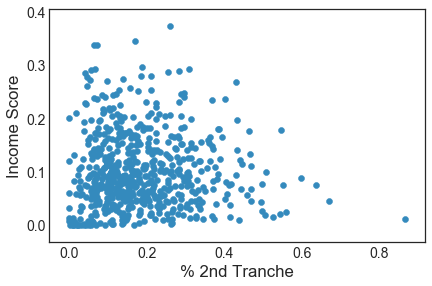

In [657]:
"""corr graphs - VDC"""

import matplotlib.pyplot as plt

corr['inc_score'].sort_values()

x = corr['houses_varified_for_second_installment']/corr['total_HH']
y = corr['inc_score']

plt.xlabel('% 2nd Tranche')
plt.ylabel('Income Score')


plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

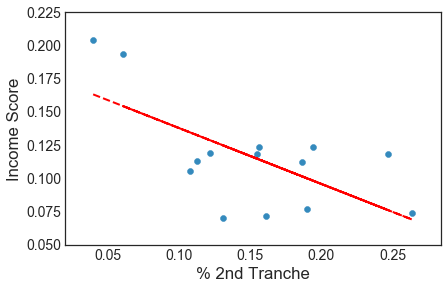

In [655]:
"""corr graphs - Dist"""

import matplotlib.pyplot as plt

corr['inc_score'].sort_values()

x = bar_grp['houses_varified_for_second_installment']/bar_grp['total_HH']
y = bar_grp['inc_score']

plt.xlabel('% 2nd Tranche')
plt.ylabel('Income Score')

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [589]:
bar_grp

,dist_hh,total_HH,houses_varified_for_second_installment,inc_score
0,Bhaktapur,19345,771.0,0.204372
1,Dhading,70578,8595.0,0.118544
2,Dolakha,52060,12833.0,0.117988
3,Gorkha,64815,10033.0,0.117753
4,Kabhrepalanchok,69823,7849.0,0.112926
5,Kathmandu,13048,793.0,0.193607
6,Lalitpur,8235,889.0,0.105301
7,Makawanpur,30238,4880.0,0.071329
8,Nuwakot,65759,12258.0,0.112092
9,Okhaldhunga,19926,5254.0,0.073133


In [474]:

bar_grp = corr[['dist_hh','total_HH', 'houses_varified_for_second_installment', 'inc_score']]\
        .groupby('dist_hh', as_index = False)\
        .agg({'total_HH' : 'sum', 'houses_varified_for_second_installment' : 'sum', 'inc_score' : 'mean'})
        
bar_grp['houses_varified_for_second_installment']/bar_grp['total_HH']

0     0.039855
1     0.121780
2     0.246504
3     0.154794
4     0.112413
5     0.060776
6     0.107954
7     0.161386
8     0.186408
9     0.263676
10    0.190204
11    0.155903
12    0.130989
13    0.194061
dtype: float64

In [496]:
type(np.array(bar_grp['houses_varified_for_second_installment']/bar_grp['total_HH'])[0])



Object `np.arrange` not found.


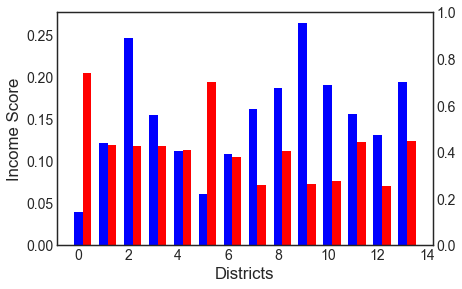

In [659]:
"""bar graphs"""

ind = np.arange(len(bar_grp))  # the x locations for the groups
width = 0.35       # the width of the bars

pct_grant = np.array(bar_grp['houses_varified_for_second_installment']/bar_grp['total_HH'])
inc_sc = np.array(bar_grp['inc_score'])

fig, ax = plt.subplots()

r1 = ax.bar(ind, pct_grant, width, color='b')
r2 = ax.bar(ind + width, inc_sc, width, color='r')

plt.ylabel('Income Score')
plt.xlabel('Districts')

ax_sec = ax.twinx()

# # add some text for labels, title and axes ticks
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

# ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

plt.show()

In [564]:
bar_grp

,dist_hh,total_HH,houses_varified_for_second_installment,inc_score
0,Bhaktapur,19345,771.0,0.204372
1,Dhading,70578,8595.0,0.118544
2,Dolakha,52060,12833.0,0.117988
3,Gorkha,64815,10033.0,0.117753
4,Kabhrepalanchok,69823,7849.0,0.112926
5,Kathmandu,13048,793.0,0.193607
6,Lalitpur,8235,889.0,0.105301
7,Makawanpur,30238,4880.0,0.071329
8,Nuwakot,65759,12258.0,0.112092
9,Okhaldhunga,19926,5254.0,0.073133


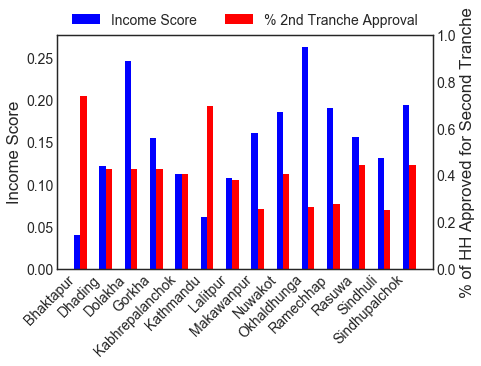

In [586]:
"""bar graphs"""

WIDTH = 1.4
ind = np.arange(len(bar_grp))  # the x locations for the groups
width = 0.35       # the width of the bars

pct_grant = np.array(bar_grp['houses_varified_for_second_installment']/bar_grp['total_HH'])
inc_sc = np.array(bar_grp['inc_score'])

fig, ax = plt.subplots()
rects1 = ax.bar(ind*WIDTH, pct_grant, width, color='b')
rects2 = ax.bar(ind*WIDTH + width, inc_sc, width, color='r')
ax.legend((rects1[0], rects2[0]), ('Income Score', '% 2nd Tranche Approval'), 
          bbox_to_anchor=(.5, 1.15), ncol = 2, loc = 'upper center', fancybox = True)
ax.set_ylabel('Income Score')

sec_ax = ax.twinx()
sec_ax.set_ylabel('% of HH Approved for Second Tranche')


plt.xticks(ind*WIDTH, bar_grp['dist_hh'])
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.style.use('seaborn-white')
plt.show()

In [602]:
corr

,district,vdc_municipality,total_HH,no_hh_with_grant_agreement,no_hh_with_first_installment,site_layout,houses_not_varified_for_second_installment,houses_varified_for_second_installment,houses_not_able_to_varified_for_sec_instal,remaining_for_second_install,houses_not_varified_for_third_installment,houses_varified_for_third_installment,houses_not_able_to_verified_for_third_instal,remaining_for_third_install,construction_completed,complainace,complaince_resolved,self_completed_houses,engineer_name,engineer_contact_no,remark,uid,data_entered_date,concat,hrrp_code,District,vdc,hlcit_code,dist_code_hh,vdcmun,vcode_hh,dist_hh,inc_10to20,inc_20to30,inc_30to50,inc_0to10,inc_greater50,vdc_dist_mrg_hh,vcode_pc,vdc_name_pc,hclit_code_pc,dist_name_pc,priority,inc_score
0,KABHREPALANCHOK,Chauri Pokhari,678,660.0,660.0,36.0,36.0,36.0,NaN,36.0,36.0,36.0,NaN,36.0,36.0,313.0,72.0,16.0,Dinesh Raj Bhattrai,9848787762,NaN,13,2017-07-02 19:21:05+00,KABHREPALANCHOKChauri Pokhari,524 2 05 24 5 068,KABHREPALANCHOK,Chauri Pokhari,524 2 05 24 5 042,524 2 05 24,68.0,Pokhari Chauri,Kabhrepalanchok,388.0,312.0,74.0,130.0,38.0,524 2 05 2468,C-BAG-24-068,Chauri Pokhari,524 2 05 24 5 042,Kabhrepalanchok,True,0.271762
1,KABHREPALANCHOK,Simthali,441,407.0,407.0,90.0,88.0,88.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,pradip pokharel,9851213857,NaN,13,2017-07-03 16:50:33+00,KABHREPALANCHOKSimthali,524 2 05 24 5 085,KABHREPALANCHOK,Simthali,524 2 05 24 5 087,524 2 05 24,85.0,Simthali,Kabhrepalanchok,151.0,51.0,3.0,274.0,0.0,524 2 05 2485,C-BAG-24-085,Simthali,524 2 05 24 5 087,Kabhrepalanchok,True,0.092206
2,KABHREPALANCHOK,Milche,436,435.0,435.0,32.0,24.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,Animesh Nepal,9842084633,NaN,13,2017-07-03 20:38:06+00,KABHREPALANCHOKMilche,524 2 05 24 5 060,KABHREPALANCHOK,Milche,524 2 05 24 5 045,524 2 05 24,60.0,Milche,Kabhrepalanchok,31.0,8.0,1.0,501.0,0.0,524 2 05 2460,C-BAG-24-060,Milche,524 2 05 24 5 045,Kabhrepalanchok,True,0.015712
3,GORKHA,Laprak,573,573.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2017-07-04 15:19:10+00,GORKHALaprak,524 3 07 36 5 037,GORKHA,Laprak,524 3 07 36 5 047,524 3 07 36,37.0,Laprak,Gorkha,118.0,11.0,2.0,475.0,1.0,524 3 07 3637,W-GAN-36-037,Laprak,524 3 07 36 5 047,Gorkha,True,0.042284
4,GORKHA,Lho,249,246.0,209.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"Due to Winter Season for last few months, the ...",11,2017-07-04 15:19:42+00,GORKHALho,524 3 07 36 5 039,GORKHA,Lho,524 3 07 36 5 040,524 3 07 36,39.0,Lho,Gorkha,124.0,7.0,5.0,143.0,8.0,524 3 07 3639,W-GAN-36-039,Lho,524 3 07 36 5 040,Gorkha,True,0.119628
5,GORKHA,Samagaun,224,220.0,207.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Due to winter season the technicians were depl...,11,2017-07-04 15:20:21+00,GORKHASamagaun,524 3 07 36 5 052,GORKHA,Samagaun,524 3 07 36 5 042,524 3 07 36,52.0,Samagaun,Gorkha,10.0,0.0,0.0,199.0,0.0,524 3 07 3652,W-GAN-36-052,Samagaun,524 3 07 36 5 042,Gorkha,True,0.007974
6,NUWAKOT,Likhu,707,683.0,683.0,156.0,150.0,174.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN,35.0,34.0,26.0,Sulabh Aryal,9841155104,NaN,16,2017-07-05 16:04:20+00,NUWAKOTLikhu,524 2 05 28 5 037,NUWAKOT,Likhu,524 2 05 28 5 017,524 2 05 28,37.0,Likhu,Nuwakot,301.0,194.0,25.0,145.0,6.0,524 2 05 2837,C-BAG-28-037,Likhu,524 2 05 28 5 017,Nuwakot,True,0.204918
7,NUWAKOT,Samudratar,500,486.0,486.0,130.0,130.0,122.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,68.0,66.0,34.0,Santosh Giri,9849738227,NaN,16,2017-07-05 16:40:53+00,NUWAKOTSamudratar,524 2 05 28 5 050,NUWAKOT,Samudratar,524 2 05 28 5 032,524 2 05 28,50.0,Samundratar,Nuwakot,55.0,17.0,12.0,456.0,8.0,524 2 05 2850,C-BAG-28-050,Samudratar,524 2 05 28 5 032,Nuwakot,True,0.056265
8,NUWAKOT,Rautbesi,796,783.0,783.0,86.0,60.0,88.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,115.0,110.0,108.0,Subhas Basnet,9813054618,NaN,16,2017-07-05 16:50:53+00,NUWAKOTRautbesi,524 2 05 28 5 046,NUWAKOT,Rautbesi,524 2 05 28 5 025,524 2 05 28,46.0,Rautbesi,Nuwakot,124.0,20.0,6.0,689.0,1.0,524 2 05 2846,

In [631]:
df = pd.DataFrame([(4,3),(4,3),(1,2),(1,2),(1,2),(1,2)])

df[0].corr(df[1])

1.0

In [728]:
"""corrl"""

corr['pct_grant'] = corr['houses_varified_for_second_installment'] / corr['total_HH']
corr['pct_remain'] = corr['houses_varified_for_second_installment'] / corr['total_HH']


bar_grp['pct_grant'] = bar_grp['houses_varified_for_second_installment'] / bar_grp['total_HH']

corr['inc_score'].corr(corr['pct_grant']) # -.02

bar_grp['pct_grant'].corr(bar_grp['inc_score']) # -.65

#by dist
res = pd.Series()
for v in corr['dist_hh'].drop_duplicates():
    if not pd.isnull(v):
        res[v] = corr[corr['dist_hh'] == v]['const_rate'].corr(corr['inc_score'])

res.sort_values()


/Users/ewanog/Documents/work/code/venv/p3/lib/python3.6/site-packages/numpy/lib/function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/ewanog/Documents/work/code/venv/p3/lib/python3.6/site-packages/numpy/lib/function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


Kabhrepalanchok   -0.319575
Rasuwa            -0.278648
Dhading           -0.036485
Lalitpur           0.396114
Ramechhap          0.596429
Dolakha            0.658109
Gorkha                  NaN
Nuwakot                 NaN
Sindhupalchok           NaN
Sindhuli                NaN
Makawanpur              NaN
Kathmandu               NaN
Okhaldhunga             NaN
Bhaktapur               NaN
dtype: float64

In [698]:
corr.columns

Index(['district', 'vdc_municipality', 'total_HH',
       'no_hh_with_grant_agreement', 'no_hh_with_first_installment',
       'site_layout', 'houses_not_varified_for_second_installment',
       'houses_varified_for_second_installment',
       'houses_not_able_to_varified_for_sec_instal',
       'remaining_for_second_install',
       'houses_not_varified_for_third_installment',
       'houses_varified_for_third_installment',
       'houses_not_able_to_verified_for_third_instal',
       'remaining_for_third_install', 'construction_completed', 'complainace',
       'complaince_resolved', 'self_completed_houses', 'engineer_name',
       'engineer_contact_no', 'remark', 'uid', 'data_entered_date', 'concat',
       'hrrp_code', 'District', 'vdc', 'hlcit_code', 'dist_code_hh', 'vdcmun',
       'vcode_hh', 'dist_hh', 'inc_10to20', 'inc_20to30', 'inc_30to50',
       'inc_0to10', 'inc_greater50', 'vdc_dist_mrg_hh', 'vcode_pc',
       'vdc_name_pc', 'hclit_code_pc', 'dist_name_pc', 'priority', '

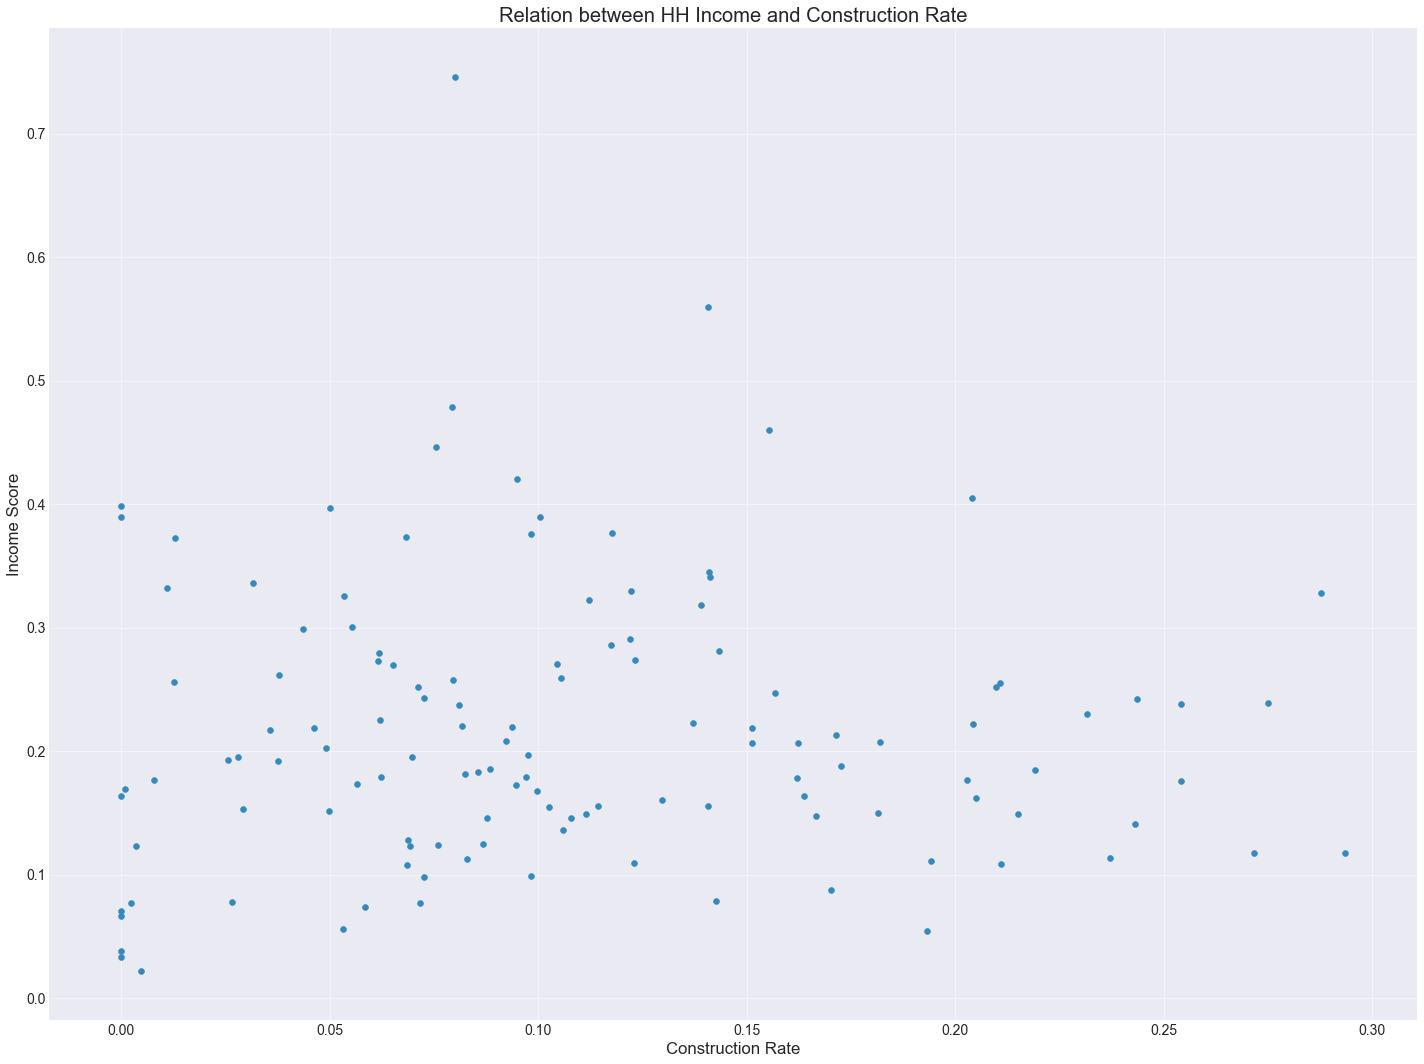

In [737]:
plt.figure(figsize=(20,15))

x = corr['inc_score']
y = corr['const_rate']

plt.xlabel('Construction Rate')
plt.ylabel('Income Score')
plt.title('Relation between HH Income and Construction Rate')

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.style.use('seaborn-darkgrid')
plt.plot(x,p(x),"r--")
        
plt.tight_layout()
plt.show()

In [740]:
"scatter plot by dist"

plt.figure(figsize=(20,15))

for loc, dist in enumerate(corr['dist_hh'].drop_duplicates().dropna()):
    plt.subplot(4, 4, loc+1)

    x = corr[corr['dist_hh'] == dist]['const_rate']
    y = corr[corr['dist_hh'] == dist]['inc_score']

    plt.xlabel('Construction Rate')
    plt.ylabel('Income Score')


    plt.title(dist)
    plt.scatter(x, y)

    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.style.use('seaborn-darkgrid')
    plt.plot(x,p(x),"r--")
        
plt.tight_layout()
plt.show()

KeyError: 'inc_score'